<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics


Загрузить датасет по url:


In [89]:
# следующая строчка подключает сертификат для защищенного соединения
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [4]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

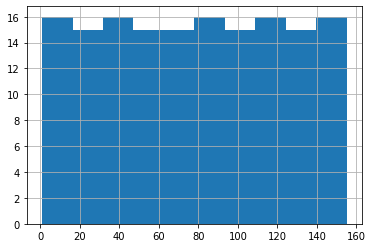

In [42]:
df.Freedom.hist()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [90]:
df=df.dropna()
print(f'медиана {statistics.median(df.Freedom)}')
print(f'мат.ожидание {statistics.mean(df.Freedom)}')

print(f'минимум {df.Freedom.min()}')
print(f'максимум {df.Freedom.max()}')
print(f'размах {df.Freedom.max()-df.Freedom.min()}')
print(f'стандартное отклонение {statistics.pstdev(df.Freedom)}')
print(f'дисперсия {statistics.pvariance(df.Freedom)}')
print(f'количество отсутствующих значений {df.Freedom.isnull().sum()}')

print(f'мода {statistics.mode(df.Freedom)}')


медиана 79.5
мат.ожидание 78.82857142857142
минимум 1.0
максимум 155.0
размах 154.0
стандартное отклонение 44.9475794449399
дисперсия 2020.2848979591836
количество отсутствующих значений 0


StatisticsError: no unique mode; found 140 equally common values

Почему нельзя найти моду?

потому что нет наиболее частого значения, есть множество значений с одинаковой частотой.

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

коэффициент Пирсона (0.6965670458090685, 1.2239087557813634e-21)


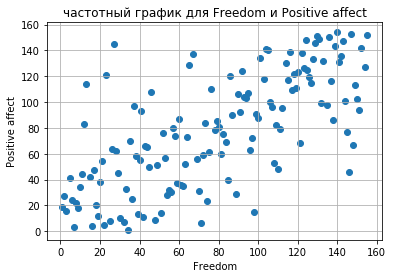

In [91]:
pearson = sts.pearsonr(df['Freedom'].dropna(), df['Positive affect'].dropna())
print(f'коэффициент Пирсона {pearson}')

x = plt.subplots()[1]
x.scatter(df['Freedom'], df['Positive affect'])
x.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('частотный график для Freedom и Positive affect')
plt.show()

Знак коэффициента Пирсона говорит о степени корреляции величин между собой. При положительном коэффициенте у величин прямая связь, при отрицательном - обратная. 

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [97]:
# a вручную можно делать нормализацию?
df['Freedom_norm'] = (df.Freedom-df.Freedom.mean())
m = df.Freedom_norm.min()
df.Freedom_norm = df.Freedom_norm/m
print(df.Freedom_norm.max())
print(df.Freedom_norm.min())


#или только библиотеками?

from sklearn import preprocessing

freedom_norm2 = preprocessing.MinMaxScaler(feature_range=(-1,1)).fit_transform(np.array(df.Freedom).reshape(-1, 1))
print(freedom_norm2.min())
print(freedom_norm2.max())

1.0
-0.9787077826725405
-0.9999999999999999
1.0000000000000002


Построить матрицу корреляций для всех колонок таблицы

                            Ladder  SD of Ladder  Positive affect  \
Ladder                    1.000000      0.555987         0.511870   
SD of Ladder              0.555987      1.000000         0.090332   
Positive affect           0.511870      0.090332         1.000000   
Negative affect           0.539677      0.632734         0.351906   
Social support            0.833412      0.600087         0.433333   
Freedom                   0.546414      0.250246         0.696567   
Corruption                0.224394      0.253344         0.225905   
Generosity                0.485704      0.386337         0.417061   
Log of GDP\nper capita    0.820608      0.663977         0.310843   
Healthy life\nexpectancy  0.826677      0.637554         0.339032   
Freedom_norm              0.546414      0.250246         0.696567   

                          Negative affect  Social support   Freedom  \
Ladder                           0.539677        0.833412  0.546414   
SD of Ladder                 

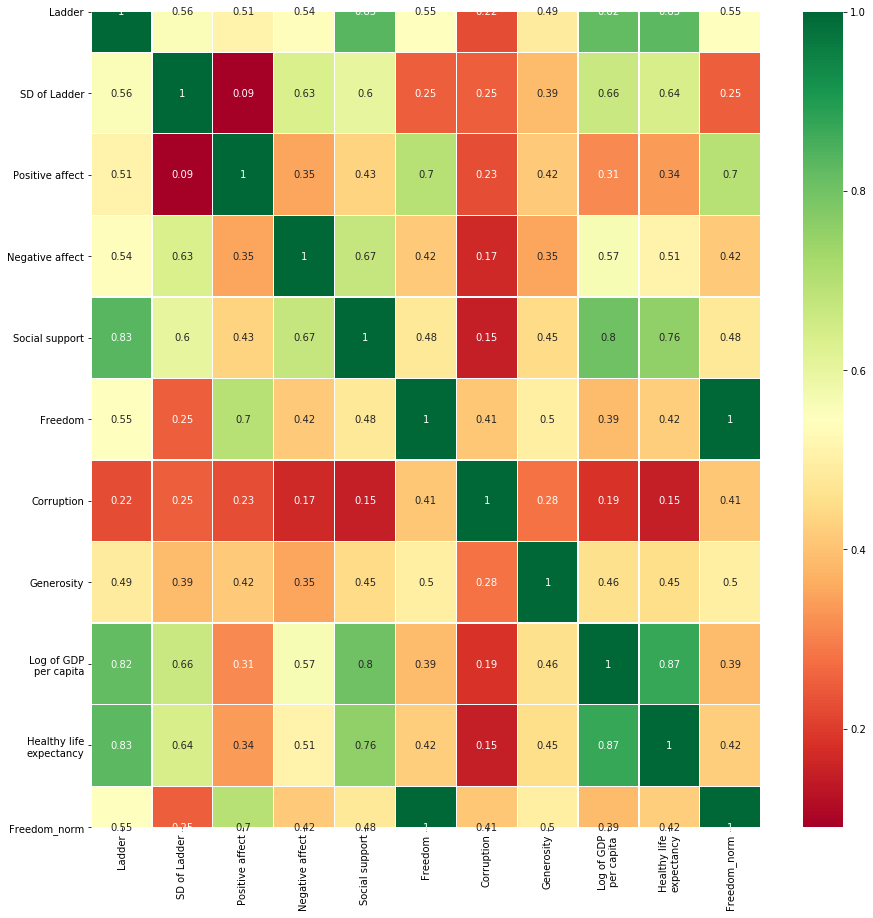

In [77]:
import seaborn as sns
print(df.corr())

fig = sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(15,15)

Загрузить таблицу цен на авокадо: 

In [99]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

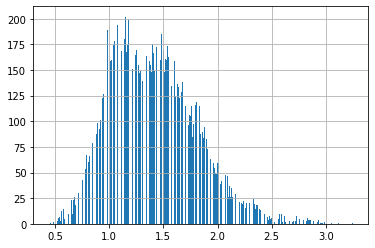

In [107]:
df['AveragePrice'].hist(bins=500)
# распределение похоже на логнормальное или кривое нормальное))

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [106]:
df[['4046','4225','4770', 'AveragePrice']].corr()

,4046,4225,4770,AveragePrice
4046,1.000000,0.926110,0.833389,-0.208317
4225,0.926110,1.000000,0.887855,-0.172928
4770,0.833389,0.887855,1.000000,-0.179446
AveragePrice,-0.208317,-0.172928,-0.179446,1.000000


Между колонками 4046, 4225 и 4770 есть довольно четкая прямая корреляция так как коэффициент положителен и недалеко от 1. Это значит, что, скорее всего, эти величины взаимозависимы.